In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.layers import Bidirectional
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.utils import resample
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.regularizers import l2

In [ ]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [ ]:
from __future__ import division, print_function
from gensim import models
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Embedding

from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import os
import collections
import re
import string

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Economic Times/SENTIMENT.CSV")

In [ ]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

In [ ]:
df.head()

,Headline,Summary,Content,Category,Date_Time,type_cat,Date,target,assigned_topic,topic_name,...,bert_label,positive_probability_d,neutral_probability_d,negative_probability_d,pos_prob_d,neg_prob_d,deberta_label,finvader,finvader_label,text_id
0,Rs note costs govt Rs to print,cost money make money last reserve bank india ...,This story originally appeared in on Jan M...,"['Business News', 'News', 'Economy', 'Finance']",2012-01-01 01:43:00,Finance,01-01-2012,story originally appear jan mumbai cost money ...,28,Currency Issue and Demonetization,...,negative,0.007144,0.984902,0.007953,0.473199,0.526801,negative,0.4009,positive,0
1,Rs note costs govt Rs to print,last reserve bank india spent crore printing c...,This story originally appeared in on Jan M...,"['Business News', 'News', 'Economy', 'Finance']",2012-01-01 03:26:00,Finance,01-01-2012,story originally appear jan mumbai cost money ...,28,Currency Issue and Demonetization,...,negative,0.001496,0.993581,0.004924,0.232996,0.767004,negative,0.3705,positive,1
2,Black money Government doubles strength of for...,ministry recently gave approval creating unit ...,NEW DELHI As part of efforts to fight black m...,"['Business News', 'News', 'Economy', 'Finance']",2012-01-01 09:11:00,Finance,01-01-2012,new delhi part effort fight black money govern...,0,Finance and Government,...,negative,0.002943,0.793054,0.204002,0.014222,0.985778,negative,0.3049,negative,2
3,Corporate governance issues too play spoilspor...,foreign portfolio investment indian stock debt...,MUMBAI Overseas investors cold shoulder to Ind...,"['Business News', 'News', 'Economy', 'Finance']",2012-01-02 23:38:00,Finance,02-01-2012,mumbai overseas investor cold shoulder india m...,26,Investment and Economic Growth,...,positive,0.936486,0.053332,0.010182,0.989244,0.010756,positive,-0.3538,negative,3
4,Government readies Rs crore infra fund plan,government finalized contour crore infrastruct...,This story originally appeared in on Jan N...,"['Business News', 'News', 'Economy', 'Finance']",2012-01-03 03:57:00,Finance,03-01-2012,story originally appear jan new delhi governme...,0,Finance and Government,...,negative,0.001454,0.991229,0.007317,0.165788,0.834212,negative,-0.3400,negative,4


In [ ]:
label_encoder = LabelEncoder()
df['deberta_label'] = label_encoder.fit_transform(df['deberta_label'])

In [ ]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print("Label Mapping:", label_mapping)

Label Mapping: {'negative': 0, 'positive': 1}


In [ ]:
# Split the data into training and testing based on the date
train_data_chunk = df[df['Date_Time'] < '2020-08-01']
test_data_chunk = df[df['Date_Time'] >= '2020-08-01']

In [ ]:
test_data_chunk.drop(test_data_chunk[test_data_chunk['text_id'] == 2247].index, inplace=True)
test_data_chunk.drop(test_data_chunk[test_data_chunk['text_id'] == 5026].index, inplace=True)

<ipython-input-10-6ee569fcd8a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_chunk.drop(test_data_chunk[test_data_chunk['text_id'] == 2247].index, inplace=True)
<ipython-input-10-6ee569fcd8a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_chunk.drop(test_data_chunk[test_data_chunk['text_id'] == 5026].index, inplace=True)


In [ ]:
test_data_chunk.head()

,Headline,Summary,Content,Category,Date_Time,type_cat,Date,target,assigned_topic,topic_name,...,bert_label,positive_probability_d,neutral_probability_d,negative_probability_d,pos_prob_d,neg_prob_d,deberta_label,finvader,finvader_label,text_id
6147,things to know about Indias new gold playbook...,gold monetisation scheme launched aim turning ...,Indian households sit on the worlds biggest pr...,"['Business News', 'News', 'Economy', 'Finance']",2020-08-03 10:21:00,Finance,03-08-2020,indian household sit world big private stock g...,14,Banking and Reserve,...,positive,0.004227,0.952456,0.043317,0.088904,0.911096,0,-0.4224,negative,6233
6148,States should not be made to bear the burden o...,state made bear burden borrowing case likely h...,The burden of borrowing from markets to make u...,"['Business News', 'News', 'Economy', 'Finance']",2020-08-01 04:23:00,Finance,01-08-2020,burden borrowing market make deficit good serv...,6,Fiscal Policy and Budgeting,...,positive,0.200887,0.760359,0.038753,0.838285,0.161715,1,0.3538,positive,6234
6149,View Reserve Bank of Indias loan restructuring...,debate governor da unveiled one rested prudent...,In finance everything that is agreeable is uns...,"['Business News', 'News', 'Economy', 'Finance']",2020-08-06 14:56:00,Finance,06-08-2020,finance everything agreeable unsound everythin...,14,Banking and Reserve,...,positive,0.008542,0.957941,0.033517,0.203098,0.796902,0,0.1393,negative,6235
6150,PNB Housing Finance appoints exSBI Card head H...,following extensive executive search considere...,New Delhi PNB Housing Finance on Thursday ...,"['Business News', 'News', 'Economy', 'Finance']",2020-08-06 15:34:00,Finance,06-08-2020,new delhi pnb housing finance thursday announc...,0,Finance and Government,...,positive,0.002274,0.988813,0.008913,0.203251,0.796749,0,0.0129,negative,6236
6151,RBI gives affordable housing rural lending sec...,facility nhb shield housing sector liquidity d...,MUMBAI A new Rs crore facility the central ba...,"['Business News', 'News', 'Economy', 'Finance']",2020-08-07 12:43:00,Finance,07-08-2020,mumbai new rs crore facility central bank offe...,14,Banking and Reserve,...,negative,0.012173,0.179429,0.808398,0.014835,0.985165,0,-0.3335,negative,6237


In [ ]:
data_majority = train_data_chunk[train_data_chunk['deberta_label'] == 0]
data_minority = train_data_chunk[train_data_chunk['deberta_label'] == 1]
print("majority class before upsample:",data_majority.shape)
print("minority class before upsample:",data_minority.shape)
data_minority_upsampled = resample(data_minority,
                                 replace=True,     # sample with replacement
                                 n_samples= data_majority.shape[0],    # to match majority class
                                 random_state=123)
data_upsampled = pd.concat([data_majority, data_minority_upsampled])
print("After upsampling\n",data_upsampled.deberta_label.value_counts(),sep = "")


majority class before upsample: (4493, 35)
minority class before upsample: (1652, 35)
After upsampling
0    4493
1    4493
Name: deberta_label, dtype: int64


In [ ]:
max_fatures = 1000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['Summary'].values)

In [ ]:
# Define the features and labels
X_train = tokenizer.texts_to_sequences(data_upsampled['Summary'].values)
X_train = pad_sequences(X_train,maxlen=29)
y_train = pd.get_dummies(data_upsampled['deberta_label']).values
X_test = tokenizer.texts_to_sequences(test_data_chunk['Summary'].values)
X_test = pad_sequences(X_test,maxlen=29)
y_test = pd.get_dummies(test_data_chunk['deberta_label']).values

In [ ]:
embed_dim = 128
lstm_out = 196
model = Sequential()
model.add(Embedding(max_fatures, 128, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.5))
model.add(Bidirectional(LSTM(196, dropout = 0.3, recurrent_dropout = 0.3 )))
model.add(Dropout(0.2))
model.add(Dense(100, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(2, activation = 'softmax'))

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# embed_dim = 128
# lstm_out = 192

# model = Sequential()
# model.add(Embedding(max_fatures, embed_dim,input_length = X_train.shape[1]))
# model.add(SpatialDropout1D(0.4))
# model.add(LSTM(lstm_out, dropout=0.4, recurrent_dropout=0.4))
# model.add(Dense(2,activation='softmax'))
# model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
# print(model.Summary())

In [ ]:
data_majority = df[df['deberta_label'] == 0]
data_minority = df[df['deberta_label'] == 1]

bias = data_minority.shape[0]/data_majority.shape[0]

In [ ]:
batch_size = 16
# # also adding weights
# class_weights = {0: 1 ,
#                 1: 1.6/bias }
class_weights = {0: 0.6825961324738831, 1: 1.8691418137553257}
model.fit(X_train, y_train, epochs = 20, batch_size=batch_size, verbose = 2,
          class_weight=class_weights)

Epoch 1/20
562/562 - 48s - loss: 0.6228 - accuracy: 0.6396 - 48s/epoch - 86ms/step
Epoch 2/20
562/562 - 41s - loss: 0.4786 - accuracy: 0.7708 - 41s/epoch - 73ms/step
Epoch 3/20
562/562 - 40s - loss: 0.4112 - accuracy: 0.8101 - 40s/epoch - 71ms/step
Epoch 4/20
562/562 - 40s - loss: 0.3604 - accuracy: 0.8415 - 40s/epoch - 71ms/step
Epoch 5/20
562/562 - 40s - loss: 0.3214 - accuracy: 0.8586 - 40s/epoch - 72ms/step
Epoch 6/20
562/562 - 40s - loss: 0.2873 - accuracy: 0.8770 - 40s/epoch - 71ms/step
Epoch 7/20
562/562 - 41s - loss: 0.2648 - accuracy: 0.8823 - 41s/epoch - 72ms/step
Epoch 8/20
562/562 - 40s - loss: 0.2475 - accuracy: 0.8929 - 40s/epoch - 72ms/step
Epoch 9/20
562/562 - 41s - loss: 0.2307 - accuracy: 0.9036 - 41s/epoch - 73ms/step
Epoch 10/20
562/562 - 41s - loss: 0.2136 - accuracy: 0.9119 - 41s/epoch - 73ms/step
Epoch 11/20
562/562 - 42s - loss: 0.1948 - accuracy: 0.9178 - 42s/epoch - 74ms/step
Epoch 12/20
562/562 - 41s - loss: 0.1890 - accuracy: 0.9204 - 41s/epoch - 73ms/step
E

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
score = model.evaluate(X_test, y_test, verbose=False)
print("loss = ",score[0])
print("accuracy = ",score[1])

loss =  1.343090534210205
accuracy =  0.7543138861656189


In [ ]:
Y_pred = model.predict(X_test, batch_size=batch_size)
df_test = pd.DataFrame({'true': [np.argmax(x) for x in y_test], 'pred': [np.argmax(x) for x in Y_pred]})
print("confusion matrix", confusion_matrix(df_test.true, df_test.pred))
print(classification_report(df_test.true, df_test.pred))


77/77 [==============================] - 1s 11ms/step
confusion matrix [[727 177]
 [122 191]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       904
           1       0.52      0.61      0.56       313

    accuracy                           0.75      1217
   macro avg       0.69      0.71      0.70      1217
weighted avg       0.77      0.75      0.76      1217



In [ ]:
y_test_pred_proba = model.predict(X_test)

# Store probabilities in the original DataFrame
for i in range(0, 2):
    test_data_chunk[f'Class_{i}_Probability'] = y_test_pred_proba[:, i]

# Optionally, you can add the predicted class as well
test_data_chunk['Predicted_Class'] = np.argmax(y_test_pred_proba, axis=1)


39/39 [==============================] - 1s 13ms/step


<ipython-input-23-874992515f24>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_chunk[f'Class_{i}_Probability'] = y_test_pred_proba[:, i]
<ipython-input-23-874992515f24>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_chunk[f'Class_{i}_Probability'] = y_test_pred_proba[:, i]
<ipython-input-23-874992515f24>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
test_data_chunk['Date'] = pd.to_datetime(test_data_chunk['Date'])

# # # # Set the 'Date' column as the index
test_data_chunk.set_index('Date', inplace=True)
# monthly_aggregated = test_data_chunk['finvader'].resample('M').agg(['min', 'max'])
# monthly_aggregated.reset_index(inplace=True)
df_monthly = test_data_chunk[['pos_prob_d','neg_prob_d','pos_prob','neg_prob','pos_prob_r','neg_prob_r','Class_0_Probability','Class_1_Probability']].resample('QS').mean()
df_monthly.reset_index(inplace = True)

<ipython-input-25-0ee2fc1e6bbb>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  test_data_chunk['Date'] = pd.to_datetime(test_data_chunk['Date'])
<ipython-input-25-0ee2fc1e6bbb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_chunk['Date'] = pd.to_datetime(test_data_chunk['Date'])


In [ ]:
df_monthly.head()

,Date,pos_prob_d,neg_prob_d,pos_prob,neg_prob,pos_prob_r,neg_prob_r,Class_0_Probability,Class_1_Probability
0,2020-01-01,0.285602,0.714398,0.364764,0.635236,0.432840,0.567160,0.685027,0.314973
1,2020-04-01,0.330543,0.669457,0.426749,0.573251,0.591907,0.408093,0.708139,0.291861
2,2020-07-01,0.410046,0.589954,0.447196,0.552804,0.483585,0.516415,0.663888,0.336112
3,2020-10-01,0.330259,0.669741,0.445184,0.554816,0.381675,0.618325,0.717155,0.282845
4,2021-01-01,0.319994,0.680006,0.345494,0.654506,0.409166,0.590834,0.682111,0.317889


In [ ]:
df_monthly.set_index('Date', inplace=True)
window_size = 3 # You can adjust the window size as needed
df_monthly_smoothed = df_monthly.rolling(window=window_size).mean()
# Drop rows with NaN values (due to the rolling mean)
df_monthly_smoothed.dropna(inplace=True)

# Reset the index for plotting
df_monthly_smoothed.reset_index(inplace=True)

In [ ]:
df_monthly_smoothed.head()

,Date,pos_prob_d,neg_prob_d,pos_prob,neg_prob,pos_prob_r,neg_prob_r,Class_0_Probability,Class_1_Probability
0,2020-07-01,0.342064,0.657936,0.412903,0.587097,0.502777,0.497223,0.685685,0.314315
1,2020-10-01,0.356949,0.643051,0.439710,0.560290,0.485722,0.514278,0.696394,0.303606
2,2021-01-01,0.353433,0.646567,0.412625,0.587375,0.424809,0.575191,0.687718,0.312282
3,2021-04-01,0.317064,0.682936,0.387239,0.612761,0.389938,0.610062,0.699184,0.300816
4,2021-07-01,0.307222,0.692778,0.372670,0.627330,0.395817,0.604183,0.717171,0.282829


In [ ]:
df_monthly.to_csv("RNN.csv")

In [ ]:
from sklearn.preprocessing import StandardScaler
numerical_columns = ['pos_prob_d','neg_prob_d','pos_prob','neg_prob','pos_prob_r','neg_prob_r','Class_0_Probability','Class_1_Probability']
scaler = StandardScaler()
df_monthly_smoothed[numerical_columns] = scaler.fit_transform(df_monthly_smoothed[numerical_columns])

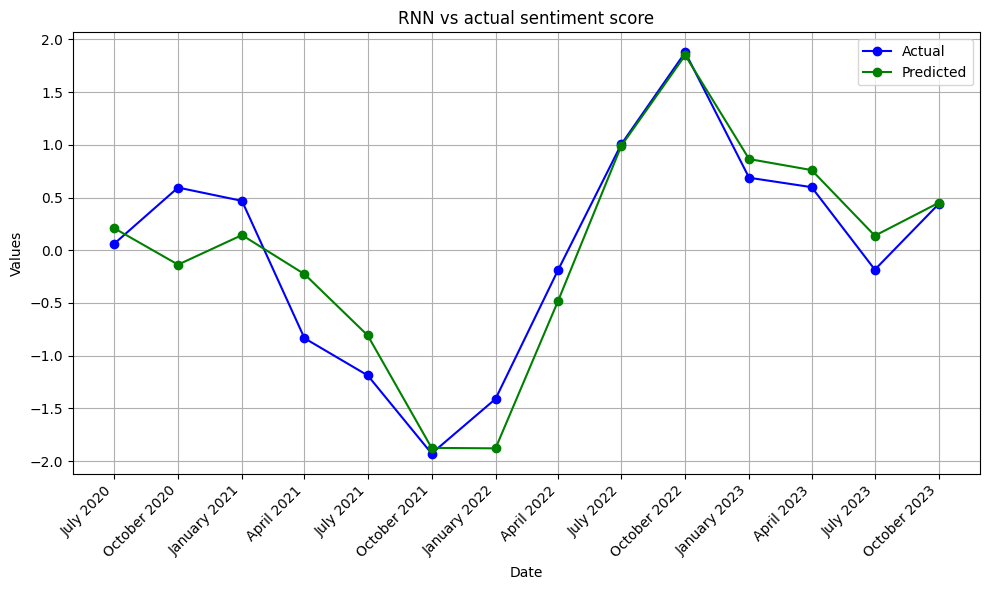

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_monthly_smoothed['Date'], df_monthly_smoothed['pos_prob_d'], marker='o', linestyle='-', color='blue', label='Actual')
plt.plot(df_monthly_smoothed['Date'], df_monthly_smoothed['Class_1_Probability'], marker='o', linestyle='-', color='green', label='Predicted')
plt.xticks(df_monthly_smoothed['Date'], df_monthly_smoothed['Date'].dt.strftime('%B %Y'), rotation=45, ha='right')
plt.title('RNN vs actual sentiment score')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Linegraph_RNN.jpg')
plt.show()